In [2]:
import gspread
import pandas as pd
import numpy as np

In [3]:
gc = gspread.service_account(filename='Credentials.json')

In [4]:
Bse = gc.open("Copy of BSE500")
worksheet=Bse.sheet1

In [5]:
In_Ex= gc.open("Copy of Income / Expense")
worksheet1=In_Ex.sheet1

In [6]:
Final_report= gc.open("Copy of Final Report")
worksheet2=Final_report.sheet1

In [7]:
sh2 = gc.open('Copy of Final Report')
worksheet2_2 = sh2.worksheet('Sheet2')

In [8]:
table1 = worksheet1.get_all_values()
headers=table1.pop(0)
df1=pd.DataFrame(table1,columns=headers)

In [9]:
df1['Amount']=df1['Amount'].astype('float')

In [10]:
df1.groupby(by='Income/Expense').sum('Amount')

,Amount
Income/Expense,
Expense,57918.28
Income,54754.00


In [11]:
df1

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note,Amount,Currency,Account,,,
0,3/2/2022 10:11,CUB - online payment,Food,,Brownie,50,Expense,,50.0,INR,50,,,
1,3/2/2022 10:11,CUB - online payment,Other,,To lended people,300,Expense,,300.0,INR,300,,,
2,3/1/2022 19:50,CUB - online payment,Food,,Dinner,78,Expense,,78.0,INR,78,,,
3,3/1/2022 18:56,CUB - online payment,Transportation,,Metro,30,Expense,,30.0,INR,30,,,
4,3/1/2022 18:22,CUB - online payment,Food,,Snacks,67,Expense,,67.0,INR,67,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,,Dinner,90,Expense,,90.0,INR,90,,,
273,11/22/2021 14:16,CUB - online payment,Food,,Lunch with company,97,Expense,,97.0,INR,97,,,
274,11/21/2021 17:07,CUB - online payment,Transportation,,Rapido,130,Expense,,130.0,INR,130,,,
275,11/21/2021 15:50,CUB - online payment,Food,,Lunch,875,Expense,,875.0,INR,875,,,


In [12]:
worksheet2.update('C7', df1.groupby(by='Income/Expense').sum()['Amount']['Income'])

C:\Users\91971\AppData\Local\Temp\ipykernel_18204\1968895168.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  worksheet2.update('C7', df1.groupby(by='Income/Expense').sum()['Amount']['Income'])


{'spreadsheetId': '1gzCcmML1Ay1abRt8e2AWY0teCBCGvW_HvidO91SYg8w',
 'updatedRange': 'Sheet1!C7',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

In [13]:
worksheet2.update('C8', df1.groupby(by='Income/Expense').sum()['Amount']['Expense'])

C:\Users\91971\AppData\Local\Temp\ipykernel_18204\1248452603.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  worksheet2.update('C8', df1.groupby(by='Income/Expense').sum()['Amount']['Expense'])


{'spreadsheetId': '1gzCcmML1Ay1abRt8e2AWY0teCBCGvW_HvidO91SYg8w',
 'updatedRange': 'Sheet1!C8',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

In [14]:
df1.groupby(by='Category').sum()['Amount']

C:\Users\91971\AppData\Local\Temp\ipykernel_18204\3970367599.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby(by='Category').sum()['Amount']


Category
Allowance           14000.00
Apparel              3388.00
Beauty                196.00
Education            1400.00
Food                23396.76
Gift                  115.00
Household           12188.00
Other               37868.00
Petty cash              3.00
Salary               8000.00
Self-development      400.00
Social Life          2513.72
Transportation       9203.80
Name: Amount, dtype: float64

In [15]:
start=10
start_2=10
for i in range(12):
    cell='B'+str(start)
    Item=worksheet2.acell(cell).value
    cell2='C'+str(start_2)
    worksheet2.update(cell2, df1.groupby(by='Category').sum()['Amount'][Item])
    start+=1
    start_2+=1
    

C:\Users\91971\AppData\Local\Temp\ipykernel_18204\3485933228.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  worksheet2.update(cell2, df1.groupby(by='Category').sum()['Amount'][Item])
C:\Users\91971\AppData\Local\Temp\ipykernel_18204\3485933228.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  worksheet2.update(cell2, df1.groupby(by='Category').sum()['Amount'][Item])
C:\Users\91971\AppData\Local\Temp\ipykernel_18204\3485933228.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only 

In [1]:
# worksheet2.update('C10', df1.groupby(by='Category').sum()['Amount']['Food'])
# worksheet2.update('C11', df1.groupby(by='Category').sum()['Amount']['Other'])
# worksheet2.update('C12', df1.groupby(by='Category').sum()['Amount']['Transportation'])
# worksheet2.update('C13', df1.groupby(by='Category').sum()['Amount']['Social Life'])
# worksheet2.update('C14', df1.groupby(by='Category').sum()['Amount']['Household'])
# worksheet2.update('C15', df1.groupby(by='Category').sum()['Amount']['Apparel'])
# worksheet2.update('C16', df1.groupby(by='Category').sum()['Amount']['Education'])
# worksheet2.update('C17', df1.groupby(by='Category').sum()['Amount']['Salary'])
# worksheet2.update('C18', df1.groupby(by='Category').sum()['Amount']['Allowance'])
# worksheet2.update('C19', df1.groupby(by='Category').sum()['Amount']['Beauty'])
# worksheet2.update('C20', df1.groupby(by='Category').sum()['Amount']['Gift'])
# worksheet2.update('C21', df1.groupby(by='Category').sum()['Amount']['Petty cash'])

In [16]:
Exp=df1.groupby(by='Income/Expense').sum()['Amount']['Expense']

C:\Users\91971\AppData\Local\Temp\ipykernel_18204\449617281.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Exp=df1.groupby(by='Income/Expense').sum()['Amount']['Expense']


In [17]:
Inc=df1.groupby(by='Income/Expense').sum()['Amount']['Income']

C:\Users\91971\AppData\Local\Temp\ipykernel_18204\2916873604.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Inc=df1.groupby(by='Income/Expense').sum()['Amount']['Income']


In [18]:
worksheet.update('AP1','Delta')

{'spreadsheetId': '1peoy4aF_MS05au5h1z4EwDzNDCck7Zq_H7ZzJGS7XC8',
 'updatedRange': "'bse500'!AP1",
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

In [19]:
worksheet.update('C24',Inc-Exp)

{'spreadsheetId': '1peoy4aF_MS05au5h1z4EwDzNDCck7Zq_H7ZzJGS7XC8',
 'updatedRange': "'bse500'!C24",
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

In [20]:
table1 = worksheet.get_all_values()
headers=table1.pop(0)
df2=pd.DataFrame(table1,columns=headers)

In [21]:
df2[['Price','52 Week High']]

,Price,52 Week High
0,"6,158.70","8,542.75"
1,"49,786.20","51,500.00"
2,"14,125.65","16,466.40"
3,"18,209.00","23,934.45"
4,"17,591.10","19,250.00"
...,...,...
496,650.05,683.55
497,242.70,492.05
498,16.65,17.90
499,59.65,169.10


In [22]:
df2['Price']=df2['Price'].str.replace(',','')
df2['52 Week High']=df2['52 Week High'].str.replace(',','')

In [23]:
df2['Price']=df2['Price'].astype('float64')
df2['52 Week High']=df2['52 Week High'].astype('float64')

In [24]:
# (52 Week High - price)/(52 week High)
for i in df2.index:
    df2['Delta'][i]=(df2['52 Week High'][i]-df2['Price'][i])/df2['52 Week High'][i]

C:\Users\91971\AppData\Local\Temp\ipykernel_18204\2568972966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Delta'][i]=(df2['52 Week High'][i]-df2['Price'][i])/df2['52 Week High'][i]


In [25]:
df2

,Company,BSE code,NSE code,ISIN,Sector,Industry,Date,Price,1 day change(%),52 Week Low,...,Dividend Yield(%),EV / EBITDA,Price / Sales,Price / Cash Flow,Earning Per Share,Book Value Per Share,Cash Flow Per Share,Free Cash Flow Per Share,Dividend Per Share,Delta
0,Sanofi India Ltd.,500674,SANOFI,INE058A01010,Healthcare,Drugs & Pharma,2022-09-05,6158.70,0.59,"6,086.30",...,7.95,16.68,4.98,25.39,425.09,631.65,242.96,459.22,490.00,0.279073
1,Page Industries Ltd.,532827,PAGEIND,INE761H01022,Textiles,Readymade Garments,2022-09-05,49786.20,-0.26,"31,500.00",...,0.74,51.79,11.75,169.84,656.83,"1,161.63",293.09,191.03,370.00,0.033278
2,Procter & Gamble Hygiene & Health Care Ltd.,500459,PGHH,INE179A01014,Consumer Staples,Household & Personal Products,2022-09-05,14125.65,0.24,"12,801.00",...,1.13,52.71,12.10,53.17,177.37,227.22,265.90,270.47,315.00,0.142153
3,Abbott India Ltd.,500488,ABBOTINDIA,INE358A01014,Healthcare,Drugs & Pharma,2022-09-05,18209.00,-1.26,"15,514.00",...,1.51,30.98,7.73,40.84,380.52,"1,403.00",445.96,446.90,275.00,0.239214
4,Bosch Ltd.,500530,BOSCHLTD,INE323A01026,Automobile,Auto Ancillaries,2022-09-05,17591.10,0.13,"12,932.45",...,1.19,25.04,4.03,192.66,438.11,"3,734.33",91.29,46.68,210.00,0.086177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Westlife Development Ltd.,505533,WESTLIFE,INE274F01020,Services,Restaurants,2022-09-05,650.05,0.82,402.30,...,0.00,34.06,7.81,59.43,3.55,30.99,10.94,1.29,0.00,0.049009
497,Wockhardt Ltd.,532300,WOCKPHARMA,INE049B01025,Healthcare,Drugs & Pharma,2022-09-05,242.70,3.01,201.50,...,0.00,20.50,1.18,8.48,-20.70,260.73,28.68,8.54,0.00,0.506757
498,Yes Bank Ltd.,532648,YESBANK,INE528G01035,Financial,Banking,2022-09-05,16.65,2.78,10.80,...,0.00,23.87,2.13,1.77,0.47,13.61,9.42,7.86,0.00,0.069832
499,Zomato Ltd.,543320,ZOMATO,INE758T01015,Services,E-Commerce,2022-09-05,59.65,-0.17,40.60,...,0.00,-40.17,10.71,-73.58,-1.21,23.01,-0.91,-1.16,0.00,0.64725


In [26]:
cell_list = worksheet.range('AP2:AP502')
cell_values = list(df2['Delta'].ravel())

for i, val in enumerate(cell_values):  #gives us a tuple of an index and value
    cell_list[i].value = val 
worksheet.update_cells(cell_list)

{'spreadsheetId': '1peoy4aF_MS05au5h1z4EwDzNDCck7Zq_H7ZzJGS7XC8',
 'updatedRange': "'bse500'!AP2:AP502",
 'updatedRows': 501,
 'updatedColumns': 1,
 'updatedCells': 501}

In [27]:
cell_values

[0.2790728980714641,
 0.03327766990291268,
 0.14215311179128418,
 0.2392137692739963,
 0.08617662337662345,
 0.06547819779078713,
 0.3928960155490767,
 0.0564862599797097,
 0.058612914651301196,
 0.042379137169480226,
 0.17847240051347885,
 0.269594565728201,
 0.14306772908366533,
 0.14023188845104578,
 0.038044306046810625,
 0.2494332247557003,
 0.11489345991561176,
 0.32336562339628755,
 0.11200000000000007,
 0.16134109529969817,
 0.12498034900172929,
 0.03806735790839408,
 0.2151151162927495,
 0.030713748084452017,
 0.1162031672460409,
 0.11808331326751748,
 0.40798525394160823,
 0.02589388696655138,
 0.16666666666666666,
 0.4335533822330888,
 0.01958762886597938,
 0.07957729856012784,
 0.15778235042900968,
 0.428266958125555,
 0.42053862894450494,
 0.4091888825865003,
 0.0880639400415727,
 0.2254603880855271,
 0.17541634139994788,
 0.3206314643440392,
 0.40508172362555717,
 0.05285991551546975,
 0.5312476226702169,
 0.006120778054228504,
 0.4006094305470551,
 0.21127705889466686,
 

In [28]:
(df2['Delta']>0).sum()
#We can figure out by this that there are no values less than 0

501

In [29]:
df2['Market Cap(Cr)']=df2['Market Cap(Cr)'].str.replace(',','').astype('float64')

In [30]:
df2['10-Year Return(%)']=df2['10-Year Return(%)'].replace('',0).astype('float64')

In [103]:
Risk=worksheet2.acell('C27').value
if Risk=='High Risk Taking':
    HRT=df2[(df2['Market Cap(Cr)']<2000) & (df2['10-Year Return(%)']<8)][['Company','Dividend Per Share']].head()['Company']
    cell_list = worksheet.range('B2:B6')
    cell_values = list(HRT['Company'])

    for i, val in enumerate(cell_values):  #gives us a tuple of an index and value
        cell_list[i].value = val 
    worksheet2_2.update_cells(cell_list)

    Amt=float(worksheet2.acell('C24').value)
    Final_amt=Amt/len(cell_values)
    Final_amt_list=[]
    
    for j in range(len(cell_values)):
        Final_amt_list.append(Final_amt)
        
    
    cell_list2 = worksheet.range('C2:C6')
    
    for i, val in enumerate(Final_amt_list):  #gives us a tuple of an index and value
        cell_list2[i].value = val 
    worksheet2_2.update_cells(cell_list2)
    

    
elif Risk=='Risk Taking':
    RT=df2[((df2['Market Cap(Cr)']>2000) & (df2['Market Cap(Cr)']<5000)) & ((df2['10-Year Return(%)']>8) & (df2['10-Year Return(%)']<15))][['Company','Dividend Per Share']].head()
    cell_list = worksheet.range('B2:B6')
    cell_values = list(RT['Company'])

    for i, val in enumerate(cell_values):  #gives us a tuple of an index and value
        cell_list[i].value = val 
    worksheet2_2.update_cells(cell_list)
    
    Amt=float(worksheet2.acell('C24').value)
    Final_amt=Amt/len(cell_values)
    Final_amt_list=[]
    
    for j in range(len(cell_values)):
        Final_amt_list.append(Final_amt)
        
    
    cell_list2 = worksheet.range('C2:C6')
    
    for i, val in enumerate(Final_amt_list):  #gives us a tuple of an index and value
        cell_list2[i].value = val 
    worksheet2_2.update_cells(cell_list2)
    
    
    
    

    
elif Risk=='Moderate Risk Taking':
    MRT=df2[((df2['Market Cap(Cr)']>5000) & (df2['Market Cap(Cr)']<15000)) & ((df2['10-Year Return(%)']>15) & (df2['10-Year Return(%)']<20))][['Company','Dividend Per Share']].head()
    cell_list = worksheet.range('B2:B6')
    cell_values = list(MRT['Company'])

    for i, val in enumerate(cell_values):  #gives us a tuple of an index and value
        cell_list[i].value = val 
    worksheet2_2.update_cells(cell_list)

    Amt=float(worksheet2.acell('C24').value)
    Final_amt=Amt/len(cell_values)
    Final_amt_list=[]
    
    for j in range(len(cell_values)):
        Final_amt_list.append(Final_amt)
        
    
    cell_list2 = worksheet.range('C2:C6')
    
    for i, val in enumerate(Final_amt_list):  #gives us a tuple of an index and value
        cell_list2[i].value = val 
    worksheet2_2.update_cells(cell_list2)
    
    
    

elif Risk=='Low Risk Taking':
    LRT=df2[(df2['Market Cap(Cr)']>15000) & (df2['10-Year Return(%)']>20)][['Company','Dividend Per Share']].head()
    cell_list = worksheet.range('B2:B6')
    cell_values = list(LRT['Company'])

    for i, val in enumerate(cell_values):  #gives us a tuple of an index and value
        cell_list[i].value = val 
    worksheet2_2.update_cells(cell_list)

    Amt=float(worksheet2.acell('C24').value)
    Final_amt=Amt/len(cell_values)
    Final_amt_list=[]
    
    for j in range(len(cell_values)):
        Final_amt_list.append(Final_amt)
        
    
    cell_list2 = worksheet.range('C2:C6')
    
    for i, val in enumerate(Final_amt_list):  #gives us a tuple of an index and value
        cell_list2[i].value = val 
    worksheet2_2.update_cells(cell_list2)
    
    
    

## subtask 3

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
#Tata Motors DVR has no entriprise value
df2['Enterprise Value(Cr)']=df2['Enterprise Value(Cr)'].str.replace(',','')
df2['Enterprise Value(Cr)']=df2['Enterprise Value(Cr)'].replace('',0).astype('float64')

In [107]:
x1=df2.groupby('Sector').median('Enterprise Value(Cr)')['Enterprise Value(Cr)']

<AxesSubplot:ylabel='Sector'>

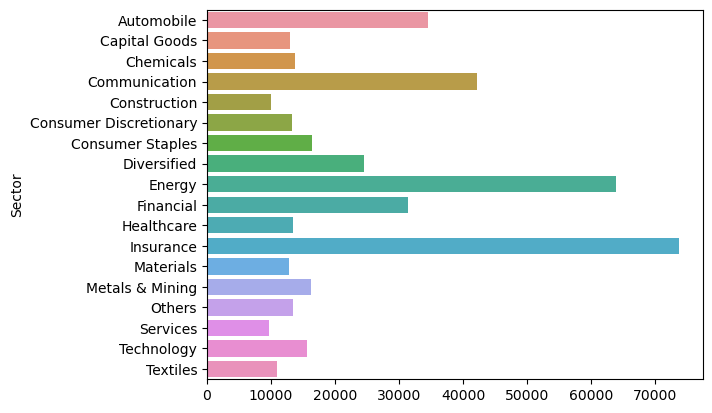

In [115]:
sns.barplot(x=x1.values,y=x1.index)

<AxesSubplot:ylabel='Sector'>

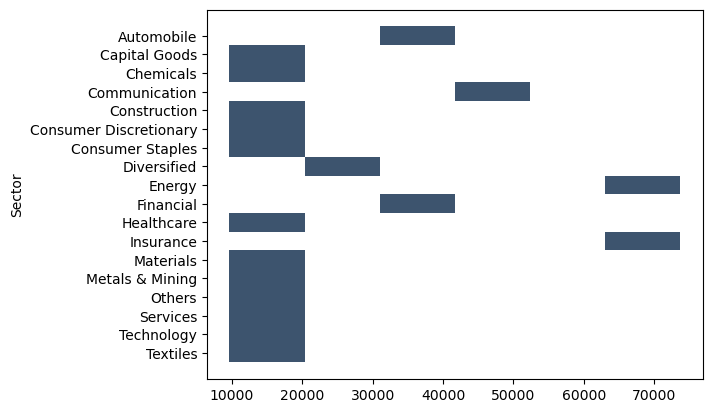

In [116]:
sns.histplot(x=x1.values,y=x1.index)

<AxesSubplot:ylabel='Sector'>

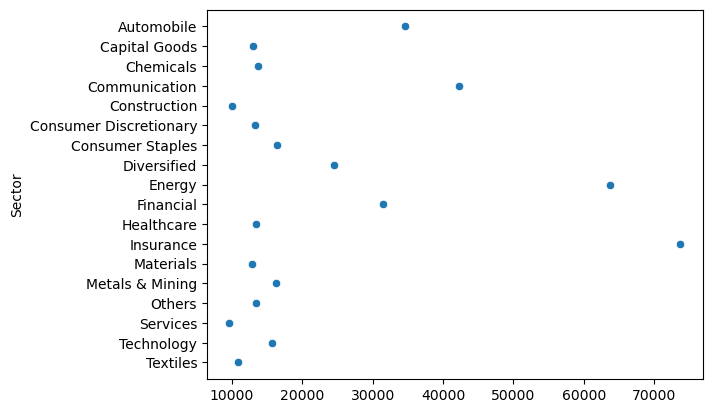

In [119]:
sns.scatterplot(x=x1.values,y=x1.index)

In [ ]:
df2['Dividend Per Share']=df2['Dividend Per Share'].replace('',0).astype('float64')

<AxesSubplot:xlabel='Market Cap(Cr)', ylabel='Dividend Per Share'>

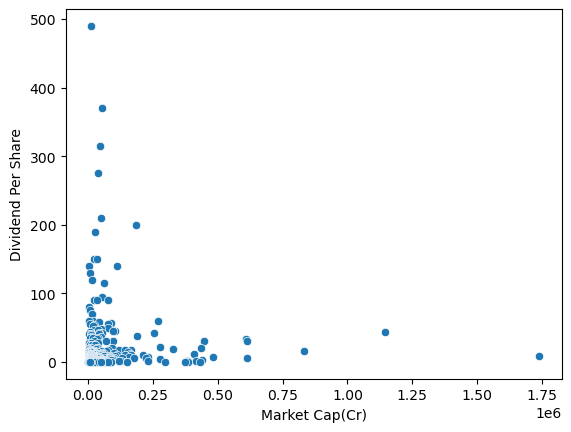

In [131]:
sns.scatterplot(x=df2['Market Cap(Cr)'],y=df2['Dividend Per Share'])

<AxesSubplot:xlabel='Market Cap(Cr)', ylabel='Dividend Per Share'>

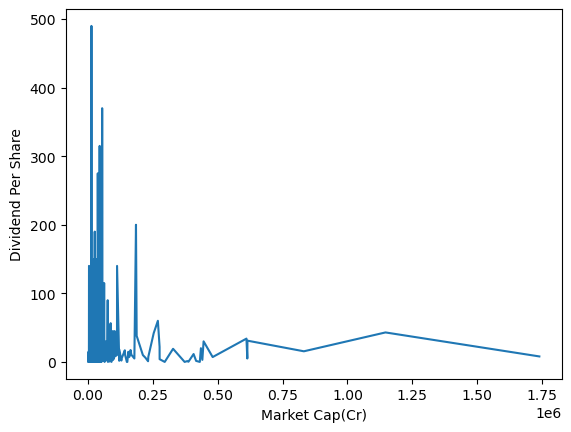

In [136]:
sns.lineplot(x=df2['Market Cap(Cr)'],y=df2['Dividend Per Share'])

In [142]:
pd.set_option('display.max_columns', None)

In [168]:

df2[df2['Sector']=='Textiles']['3-Year Return']

1       41.31
111     18.76
172     47.64
249     23.67
388     93.52
398     74.36
399     14.28
413    101.98
490      2.24
Name: 3-Year Return, dtype: object

In [157]:
df2['Sector'].unique()

array(['Healthcare', 'Textiles', 'Consumer Staples', 'Automobile',
       'Technology', 'Chemicals', 'Financial', 'Capital Goods',
       'Materials', 'Services', 'Consumer Discretionary',
       'Metals & Mining', 'Energy', 'Construction', 'Communication',
       'Diversified', 'Insurance', 'Others'], dtype=object)

In [159]:
df2['3-Year Return'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 501 entries, 0 to 500
Series name: 3-Year Return
Non-Null Count  Dtype 
--------------  ----- 
501 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB
